# Framing the Problem

The question is taken from kaggle

# Obtain Data

### Importing Packages

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ses
import missingno as ms
%matplotlib inline

In [193]:
data=pd.read_csv('titanic.csv')

# Analyze Data

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [195]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


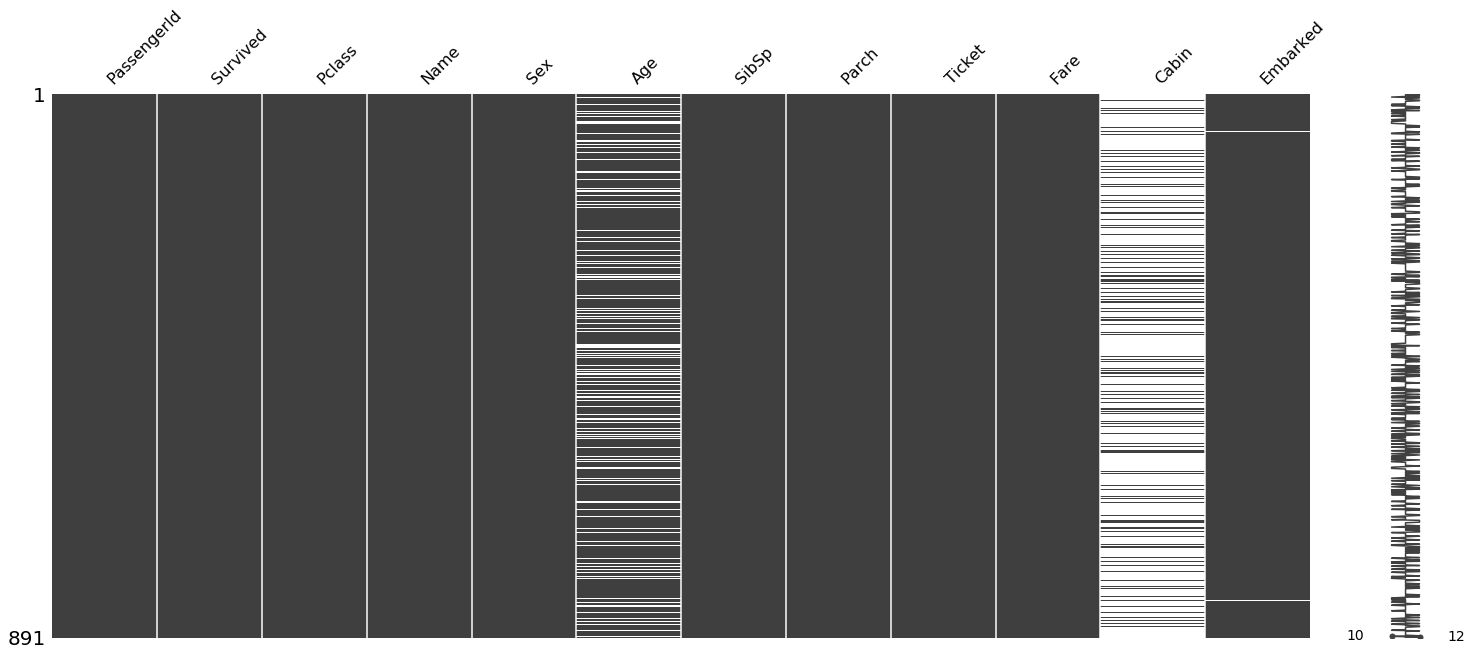

In [196]:
ms.matrix(data)

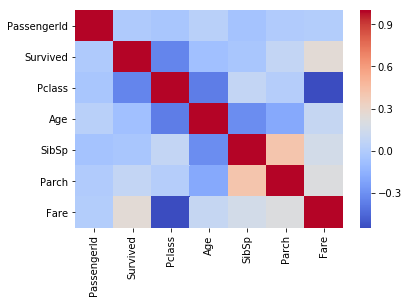

In [197]:
ses.heatmap(data.corr(),cmap='coolwarm')

In [198]:
id=data['PassengerId']
data.drop('PassengerId',axis=1,inplace=True)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


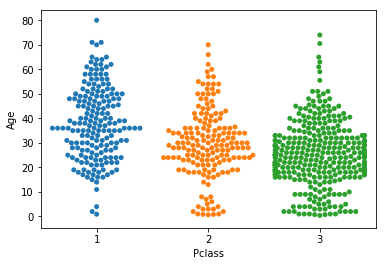

In [200]:
ses.swarmplot(x=data['Pclass'],y=data['Age'],data=data)

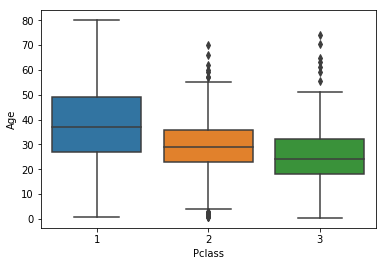

In [201]:
ses.boxplot(x=data['Pclass'],y=data['Age'],data=data)

# Feature Engineering

In [202]:
for i in range(len(id)):
    if pd.isnull(data['Age'][i]) and data['Pclass'][i]==1:
        data['Age'][i]=39
    elif pd.isnull(data['Age'][i]) and data['Pclass'][i]==2:
        data['Age'][i]=30
    elif pd.isnull(data['Age'][i]) and data['Pclass'][i]==3:
        data['Age'][i]=24

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing i

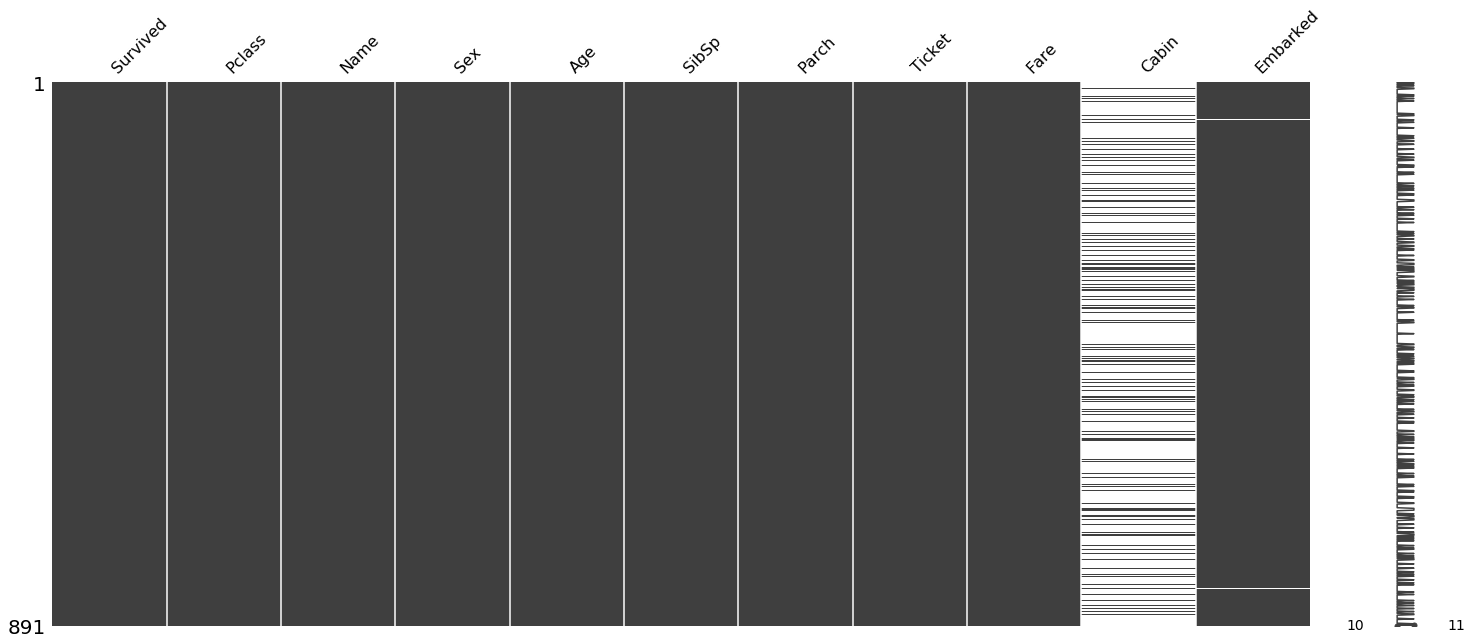

In [203]:
ms.matrix(data)

In [204]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [205]:
data['Embarked'].fillna('S',inplace=True)

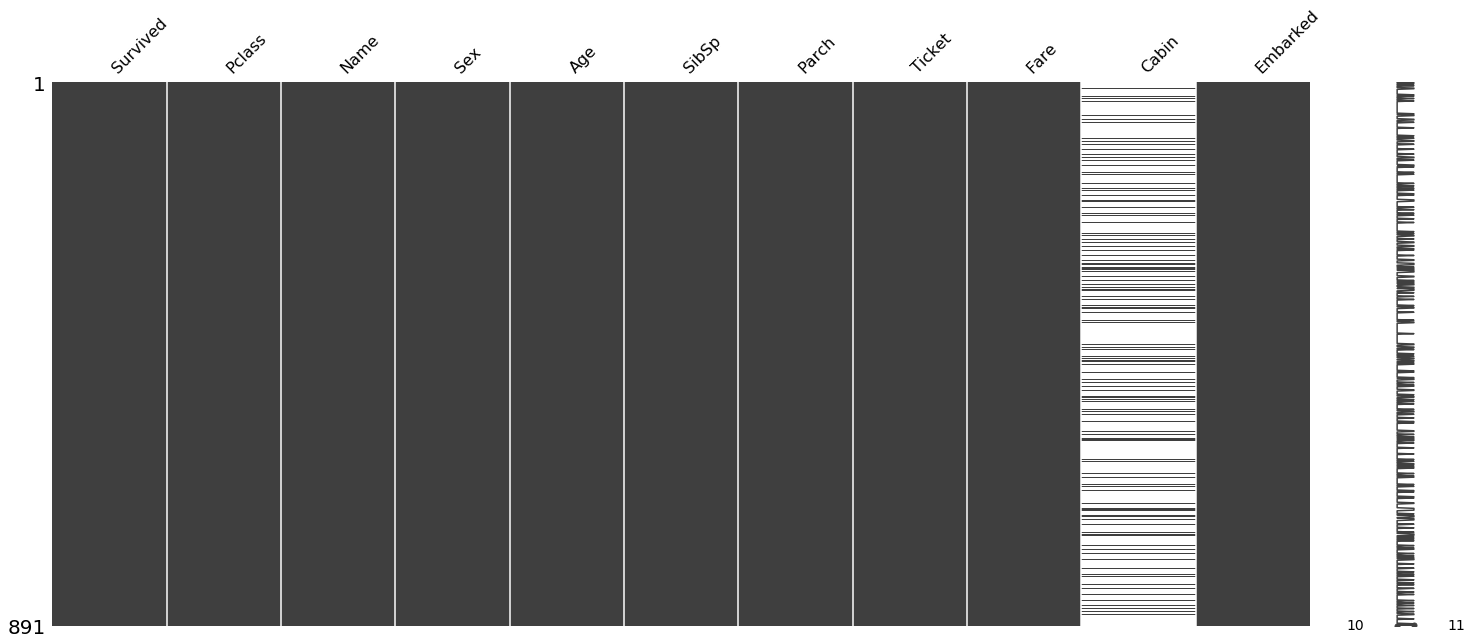

In [206]:
ms.matrix(data)

In [207]:
data.drop('Cabin',axis=1,inplace=True)

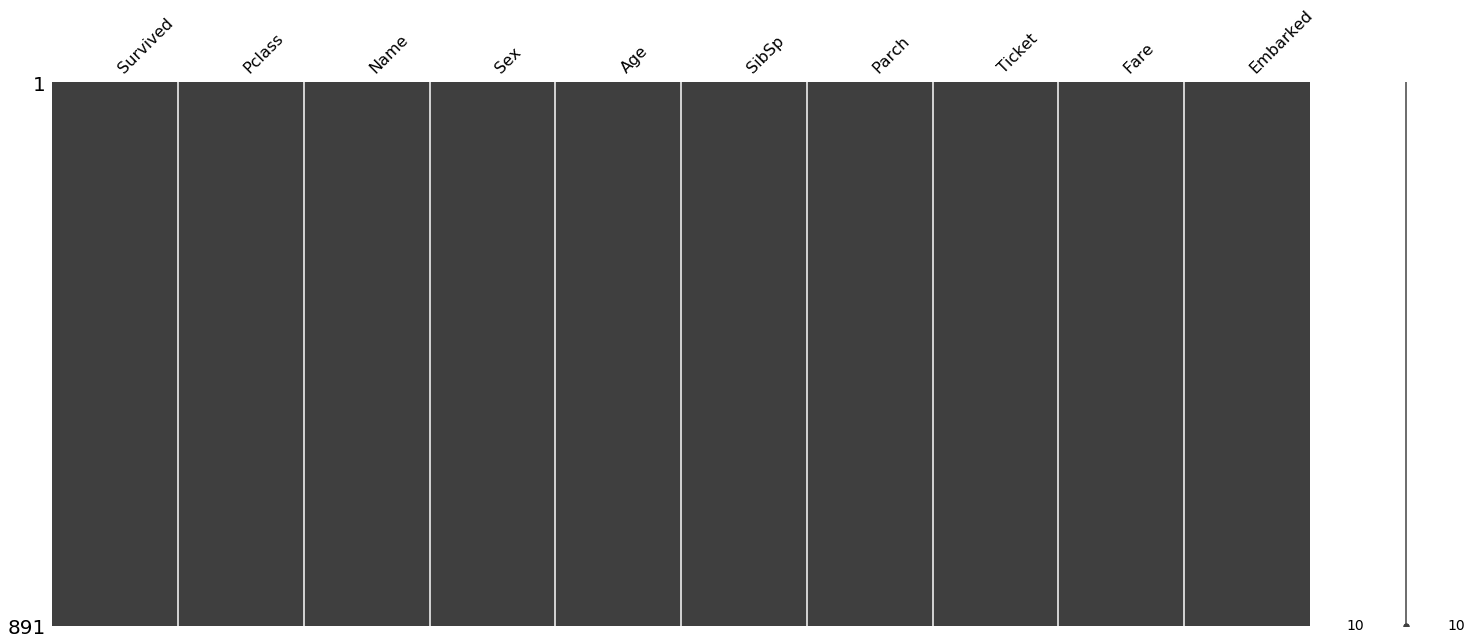

In [208]:
ms.matrix(data)

## Categorical Conversion

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [210]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
emb=pd.get_dummies(data['Embarked'],drop_first=True)

In [211]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [212]:
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [213]:
data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [215]:
data=pd.concat([data,sex,emb],axis=1)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
male        891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


# Model Selection

In [218]:
from xgboost.sklearn import XGBClassifier

In [219]:
from sklearn.grid_search import GridSearchCV

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.30,random_state=53)

In [222]:
rf=XGBClassifier(learning_rate=0.01,
                 n_estimators=90,
                 max_depth=4,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 objective='binary:logistic',
                 reg_alpha=0,
                 seed=27)
rf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=90,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [223]:
parameters={
    'max_depth':[1,2,3]
}

model_grid=GridSearchCV(rf,parameters,cv=3,n_jobs=5)
model_grid.fit(X_train,y_train)
print(model_grid.grid_scores_)
print(model_grid.best_params_)
print(model_grid.best_score_)

[mean: 0.78812, std: 0.01732, params: {'max_depth': 1}, mean: 0.80257, std: 0.02179, params: {'max_depth': 2}, mean: 0.81380, std: 0.02605, params: {'max_depth': 3}]
{'max_depth': 3}
0.8138041733547352


In [224]:
predict=rf.predict(X_test)

In [225]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [226]:
print(confusion_matrix(y_test,predict))

[[151  12]
 [ 40  65]]


In [227]:
print(accuracy_score(y_test,predict))

0.8059701492537313


In [228]:
print(precision_score(y_test,predict))

0.8441558441558441


In [229]:
print(recall_score(y_test,predict))

0.6190476190476191


In [230]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.79      0.93      0.85       163
          1       0.84      0.62      0.71       105

avg / total       0.81      0.81      0.80       268



# Predicting new cases

In [231]:
tdata=pd.read_csv('production.csv')

In [232]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


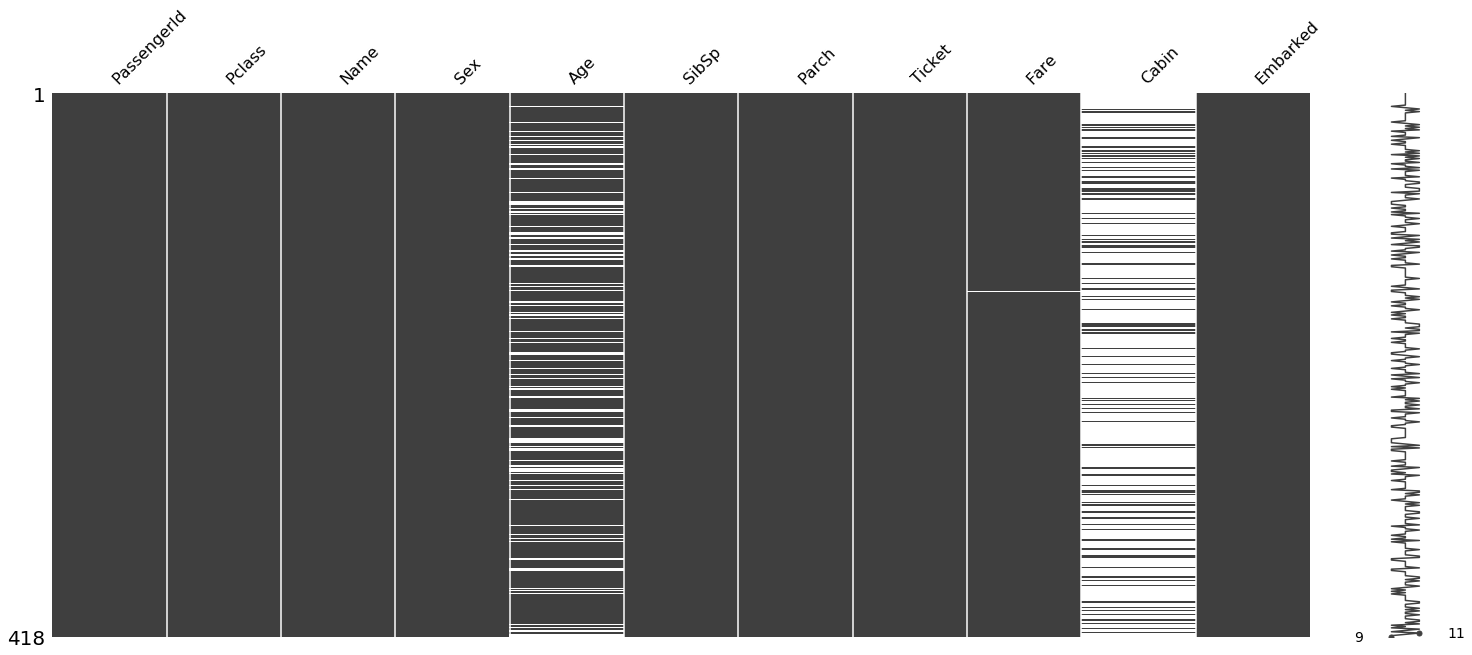

In [233]:
ms.matrix(tdata)

In [234]:
tid=tdata['PassengerId']
tdata.drop('PassengerId',axis=1,inplace=True)

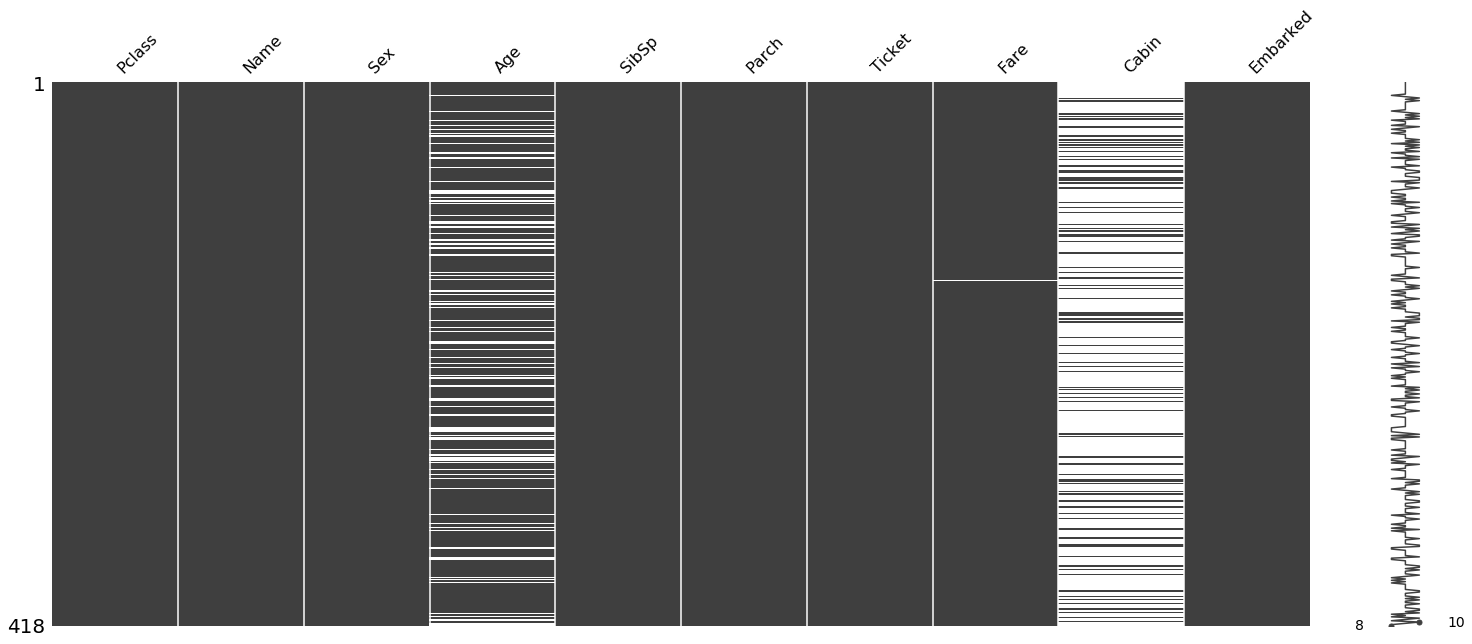

In [235]:
ms.matrix(tdata)

In [236]:
for i in range(len(tid)):
    if pd.isnull(tdata['Age'][i]) and tdata['Pclass'][i]==1:
        tdata['Age'][i]=39
    elif pd.isnull(tdata['Age'][i]) and tdata['Pclass'][i]==2:
        tdata['Age'][i]=30
    elif pd.isnull(tdata['Age'][i]) and tdata['Pclass'][i]==3:
        tdata['Age'][i]=24

C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\AppData\Local\conda\conda\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

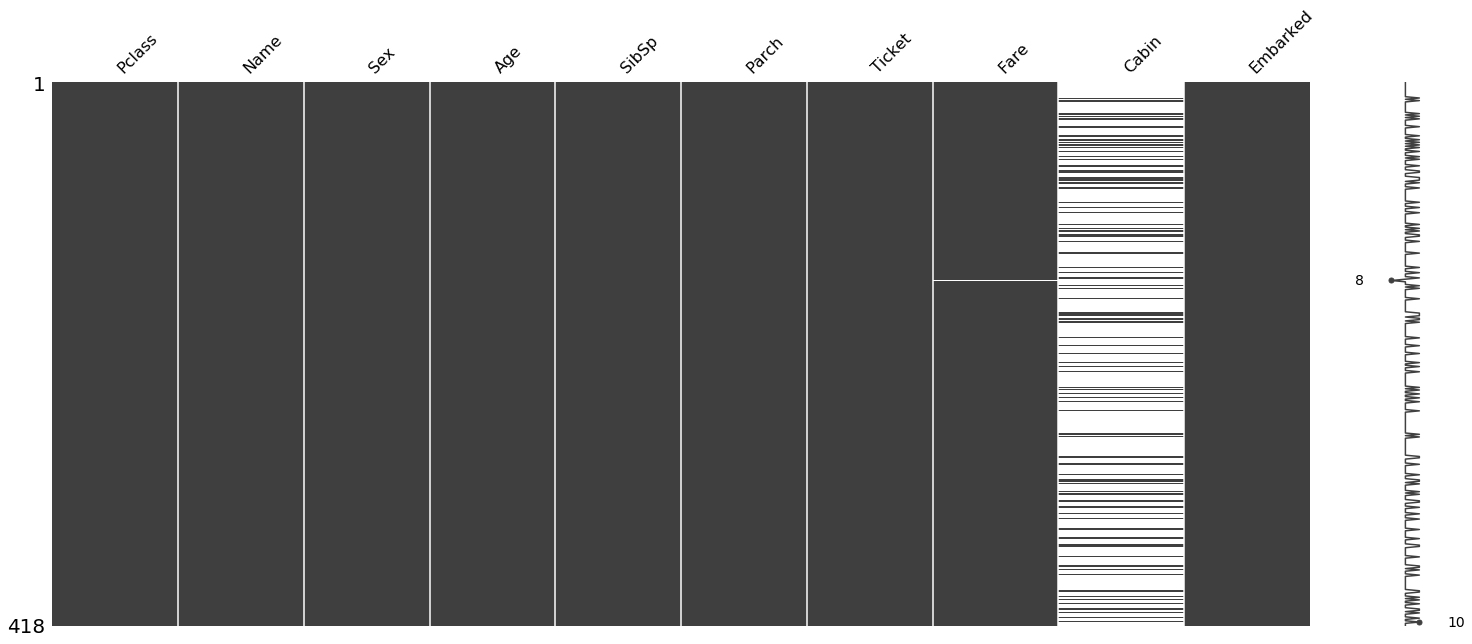

In [237]:
ms.matrix(tdata)

In [238]:
tdata['Fare'].fillna(tdata['Fare'].median(),inplace=True)

In [239]:
tdata.drop('Cabin',axis=1,inplace=True)

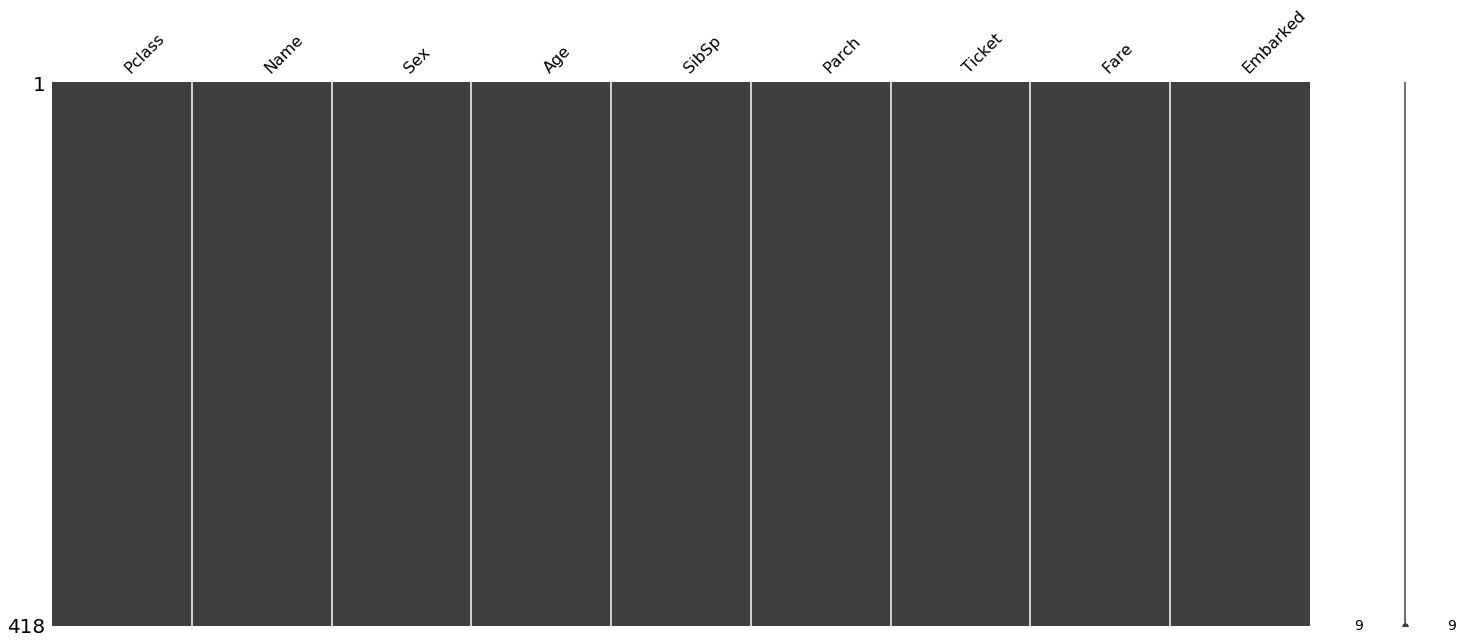

In [240]:
ms.matrix(tdata)

In [241]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [242]:
sex=pd.get_dummies(tdata['Sex'],drop_first=True)
emb=pd.get_dummies(tdata['Embarked'],drop_first=True)
tdata.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
tdata=pd.concat([tdata,sex,emb],axis=1)

In [243]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
male        891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [245]:
answer=rf.predict(tdata)

In [246]:
answer

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [247]:
df1=pd.DataFrame(tid,columns=['PassengerId'])

In [248]:
df2=pd.DataFrame(answer,columns=['Survived'])

In [249]:
df1.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [250]:
df2.head()

,Survived
0,0
1,1
2,0
3,0
4,0


In [251]:
output=pd.concat([df1,df2],axis=1)

In [252]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [253]:
output.to_csv('output.csv',index=False)